In [1]:
import coursier.MavenRepository

interp.repositories() ++= Seq(MavenRepository(
  "http://dl.bintray.com/cibotech/public"
))

import coursier.MavenRepository



In [2]:
import $ivy.`com.stripe::rainier-core:0.2.2`
import com.stripe.rainier.core._
import com.stripe.rainier.sampler._
import $ivy.`com.stripe::rainier-plot:0.2.2`

import $ivy.$                               

import com.stripe.rainier.core._

import com.stripe.rainier.sampler._

import $ivy.$                               

In [3]:
val (alpha, beta, sigma) =  (-1.5, 2.0, 0.5)

// using sampling monad to create synthetic data
val lm = for {
    x <- Normal(0, 1).param
    y <- Normal(alpha + beta * x, sigma).param
} yield (x, y)

implicit val s = RNG.default
val sims = lm.sample(100)

alpha: Double = -1.5
beta: Double = 2.0
sigma: Double = 0.5
lm: RandomVariable[(com.stripe.rainier.compute.Real, com.stripe.rainier.compute.Real)] = com.stripe.rainier.core.RandomVariable@303a2c9e
s: RNG = ScalaRNG(1555339946882L)
sims: List[(Double, Double)] = List(
  (-0.27247704057213673, -2.937174139009242),
  (0.904706738880923, 0.2873337749353697),
  (0.852183004859444, 0.21651653790799275),
  (-0.39035717167844597, -1.7128969360400819),
  (-0.39035717167844597, -1.7128969360400819),
  (-0.32022958270507923, -2.6778655637209248),
  (-0.46351051511185715, -2.191504684058077),
  (-0.46351051511185715, -2.191504684058077),
  (-0.46351051511185715, -2.191504684058077),
  (-0.46351051511185715, -2.191504684058077),
  (1.3771155460388853, 1.3365959279685458),
  (-0.49530687121967953, -1.833522063303271),
  (1.0768869181666785, 0.2563581689102623),
  (1.0768869181666785, 0.2563581689102623),
  (-1.0116365008420507, -3.752541734789177),
  (2.7476547917502754, 3.8144224426177082),
  (2.74

In [4]:
import com.cibo.evilplot.numeric.Point
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.renderers.PointRenderer
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

def renderBytes(plot: com.cibo.evilplot.plot.Plot) = {
    val baos = new java.io.ByteArrayOutputStream
    javax.imageio.ImageIO
      .write(
        plot.render().asBufferedImage,
        "png",
        baos)
    val array = baos.toByteArray
    baos.close
    array
}

import com.cibo.evilplot.numeric.Point

import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.renderers.PointRenderer

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._


defined function renderBytes

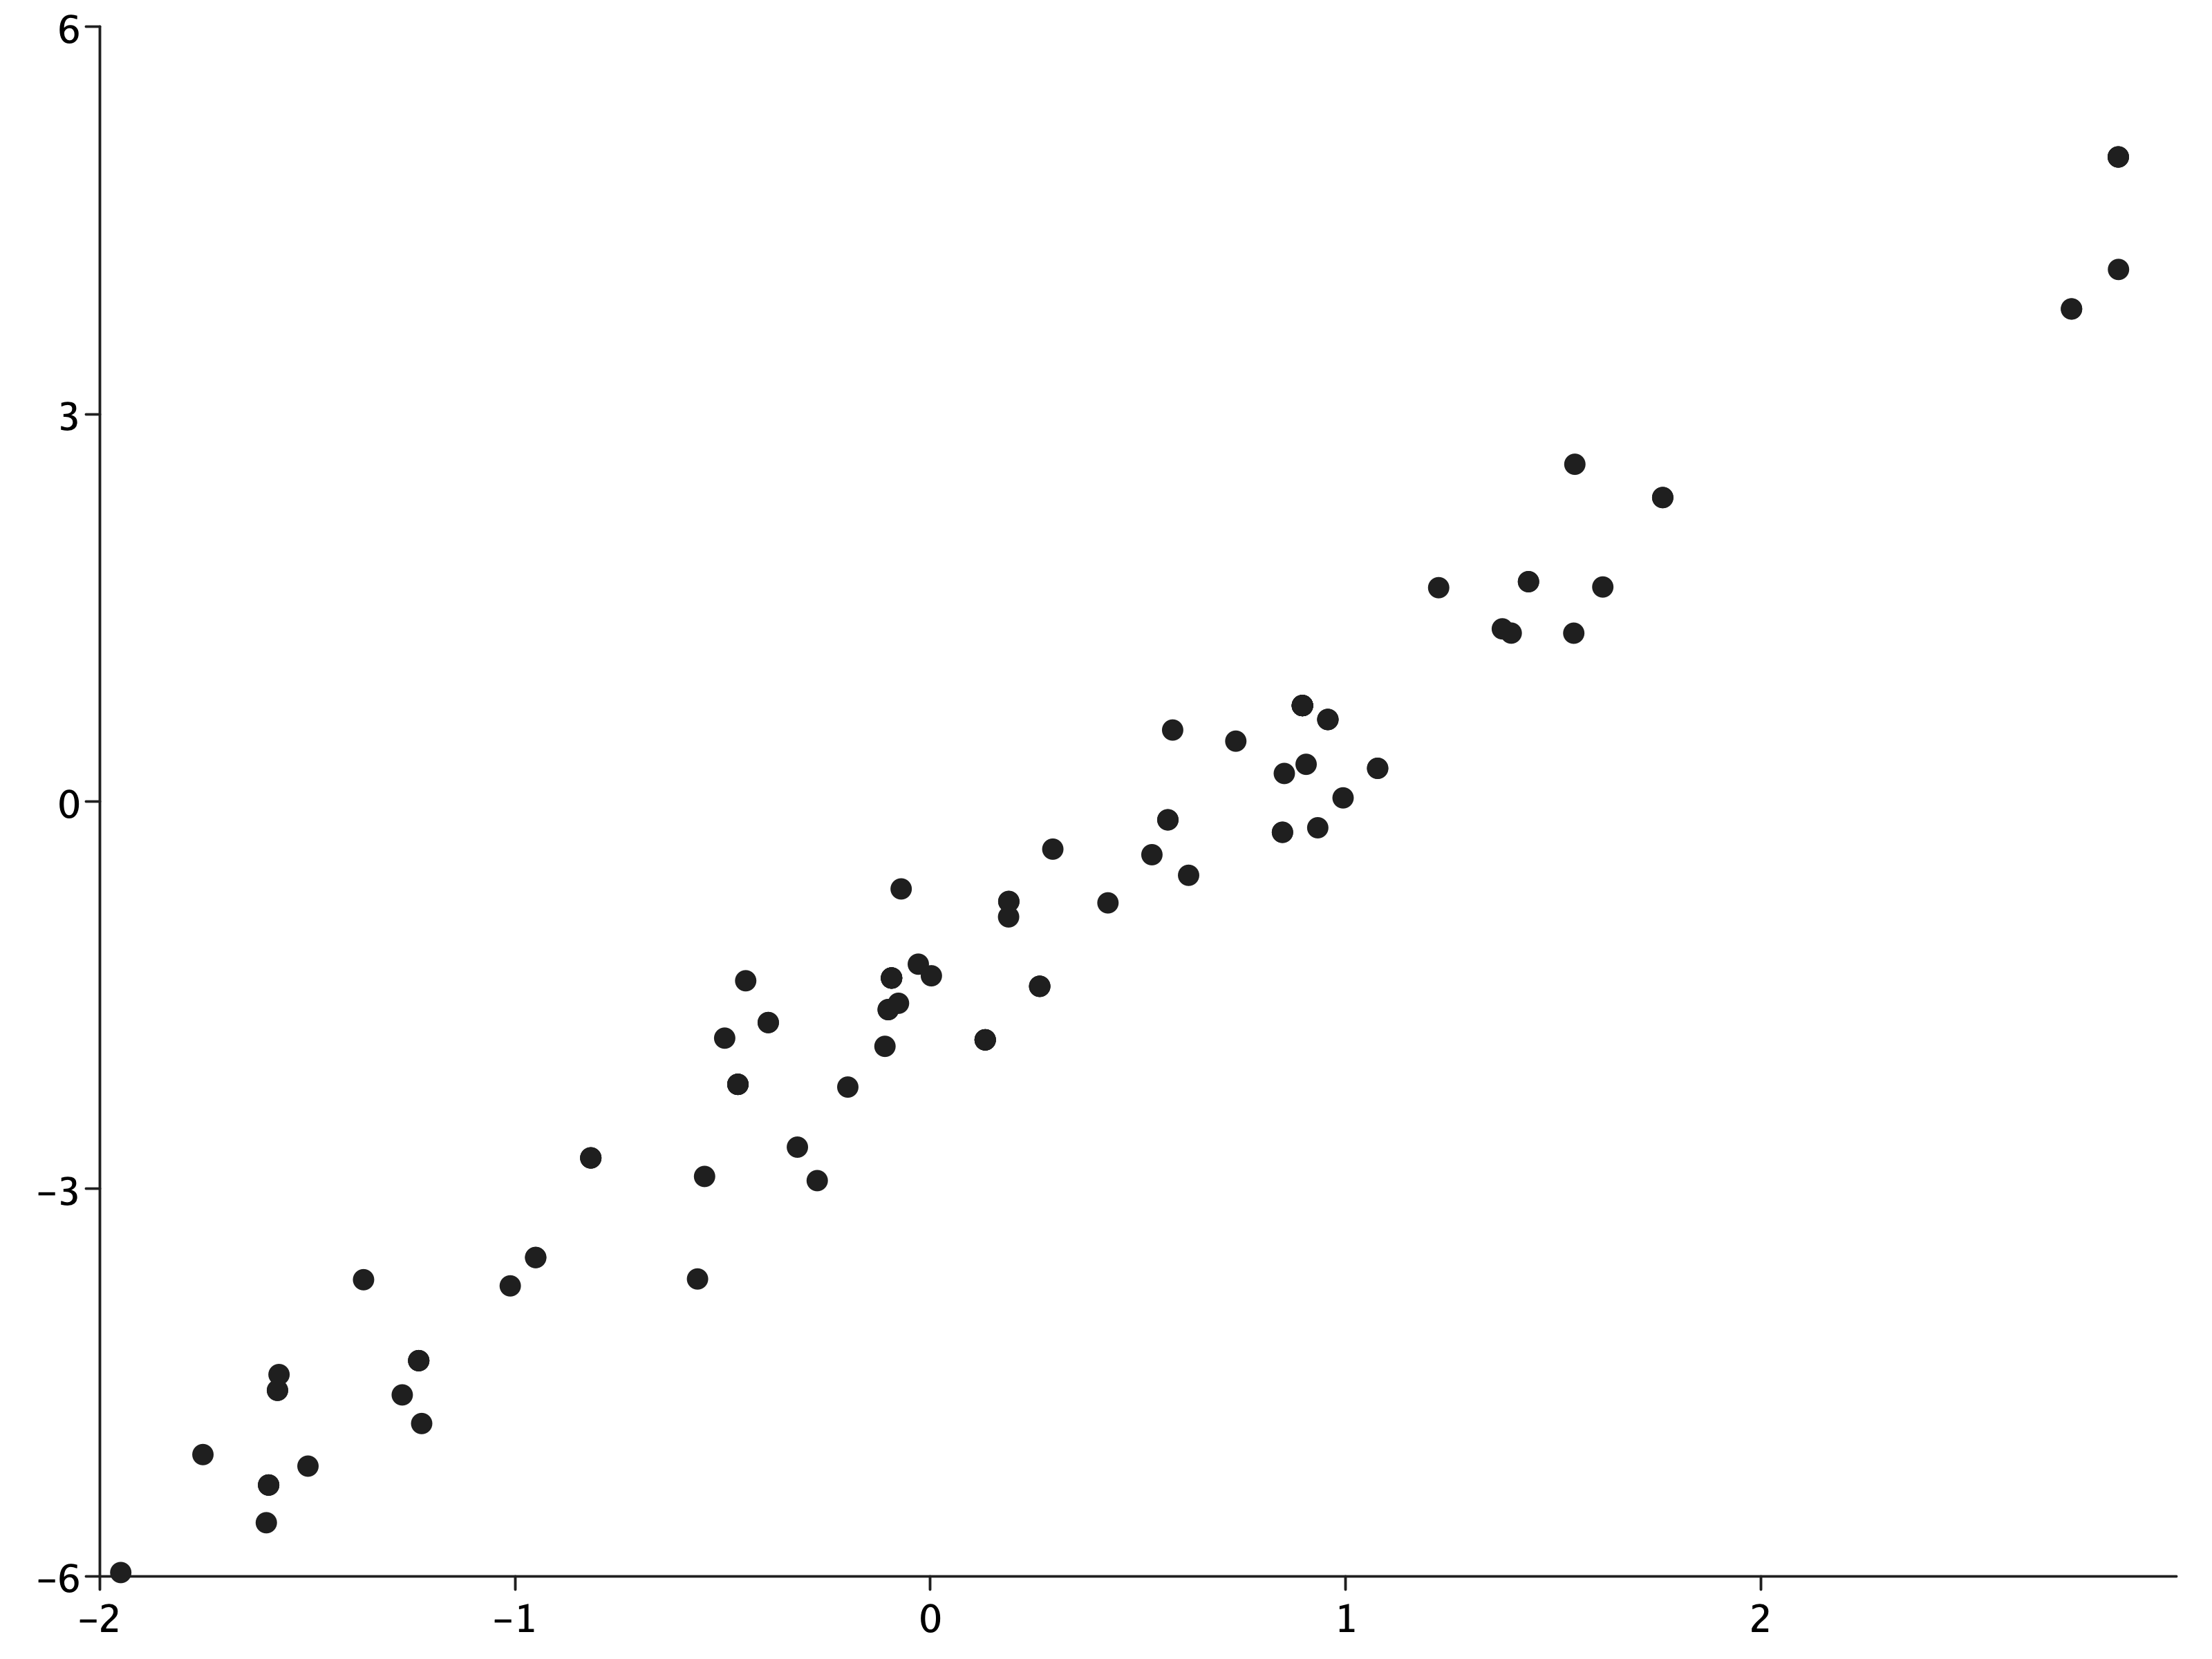

import almond.interpreter.api._



In [5]:
import almond.interpreter.api._

DisplayData
  .png(renderBytes(ScatterPlot(
      sims.map { case (x, y) => Point(x, y) }
    ).xAxis()
     .yAxis()
     .frame()
     .rightLegend()))
 .show()

In [7]:
import com.stripe.rainier.compute._
// import com.stripe.rainier.core._
// import com.stripe.rainier.sampler._

def linearModel(data: Seq[(Double, Double)]): RandomVariable[Map[String, Real]] = for {
    alpha <- Normal(0, 5).param
    beta <- Normal(0, 5).param
    sigma <- LogNormal(2, 2).param
    _ <- Predictor[Double].from { x =>
      Normal(alpha + beta * x, sigma)
    }
    .fit(data)
  } yield Map("alpha" -> alpha, "beta" -> beta, "sigma" -> sigma)

import com.stripe.rainier.compute._
// import com.stripe.rainier.core._
// import com.stripe.rainier.sampler._


defined function linearModel

In [25]:
val iters = linearModel(sims).sample(HMC(5), 5000, 100000, 100)

iters: List[Map[String, Double]] = List(
  Map(
    "alpha" -> -1.5103698284824398,
    "beta" -> 2.1544564171494365,
    "sigma" -> 0.41662922813248277
  ),
  Map(
    "alpha" -> -1.5184685380426082,
    "beta" -> 2.151465637838073,
    "sigma" -> 0.44342253807901993
  ),
  Map(
    "alpha" -> -1.4660649259572445,
    "beta" -> 2.109083551551442,
    "sigma" -> 0.4400355956497668
  ),
  Map(
    "alpha" -> -1.4109510885911971,
    "beta" -> 2.1277107205510815,
    "sigma" -> 0.4686446685131451
  ),
  Map(
    "alpha" -> -1.5024888711982174,
    "beta" -> 2.177295567537438,
    "sigma" -> 0.4441577745103689
  ),
  Map(
    "alpha" -> -1.5198813109824225,
    "beta" -> 2.17897636639043,
    "sigma" -> 0.5047230361547242
  ),
  Map(
    "alpha" -> -1.4834223247926301,
    "beta" -> 2.172806338771708,
    "sigma" -> 0.48139800434682717
  ),
  Map(
    "alpha" -> -1.544972407765386,
    "beta" -> 2.1307286606911577,
...

In [19]:
import com.cibo.evilplot.geometry._
import com.stripe.rainier.plot._

def traces(out: Seq[Map[String, Double]],
         truth: Map[String, Double] = Map(),
         lagMax: Int = 40,
         numBars: Int = 50): Unit =
    DisplayData
      .png(
        EvilTracePlot.renderBytes(
          EvilTracePlot.traces(out, truth, lagMax, numBars),
          Extent(1200, out.head.keys.size * 300.0)))
      .show()

  def pairs(out: Seq[Map[String, Double]],
            truth: Map[String, Double] = Map(),
            numBars: Int = 30): Unit =
    DisplayData
      .png(
        EvilTracePlot.renderBytes(EvilTracePlot.pairs(out, truth, numBars),
                                  Extent(out.head.keys.size * 300.0,
                                         out.head.keys.size * 300.0)))
      .show()

import com.cibo.evilplot.geometry._

import com.stripe.rainier.plot._


defined function traces
defined function pairs

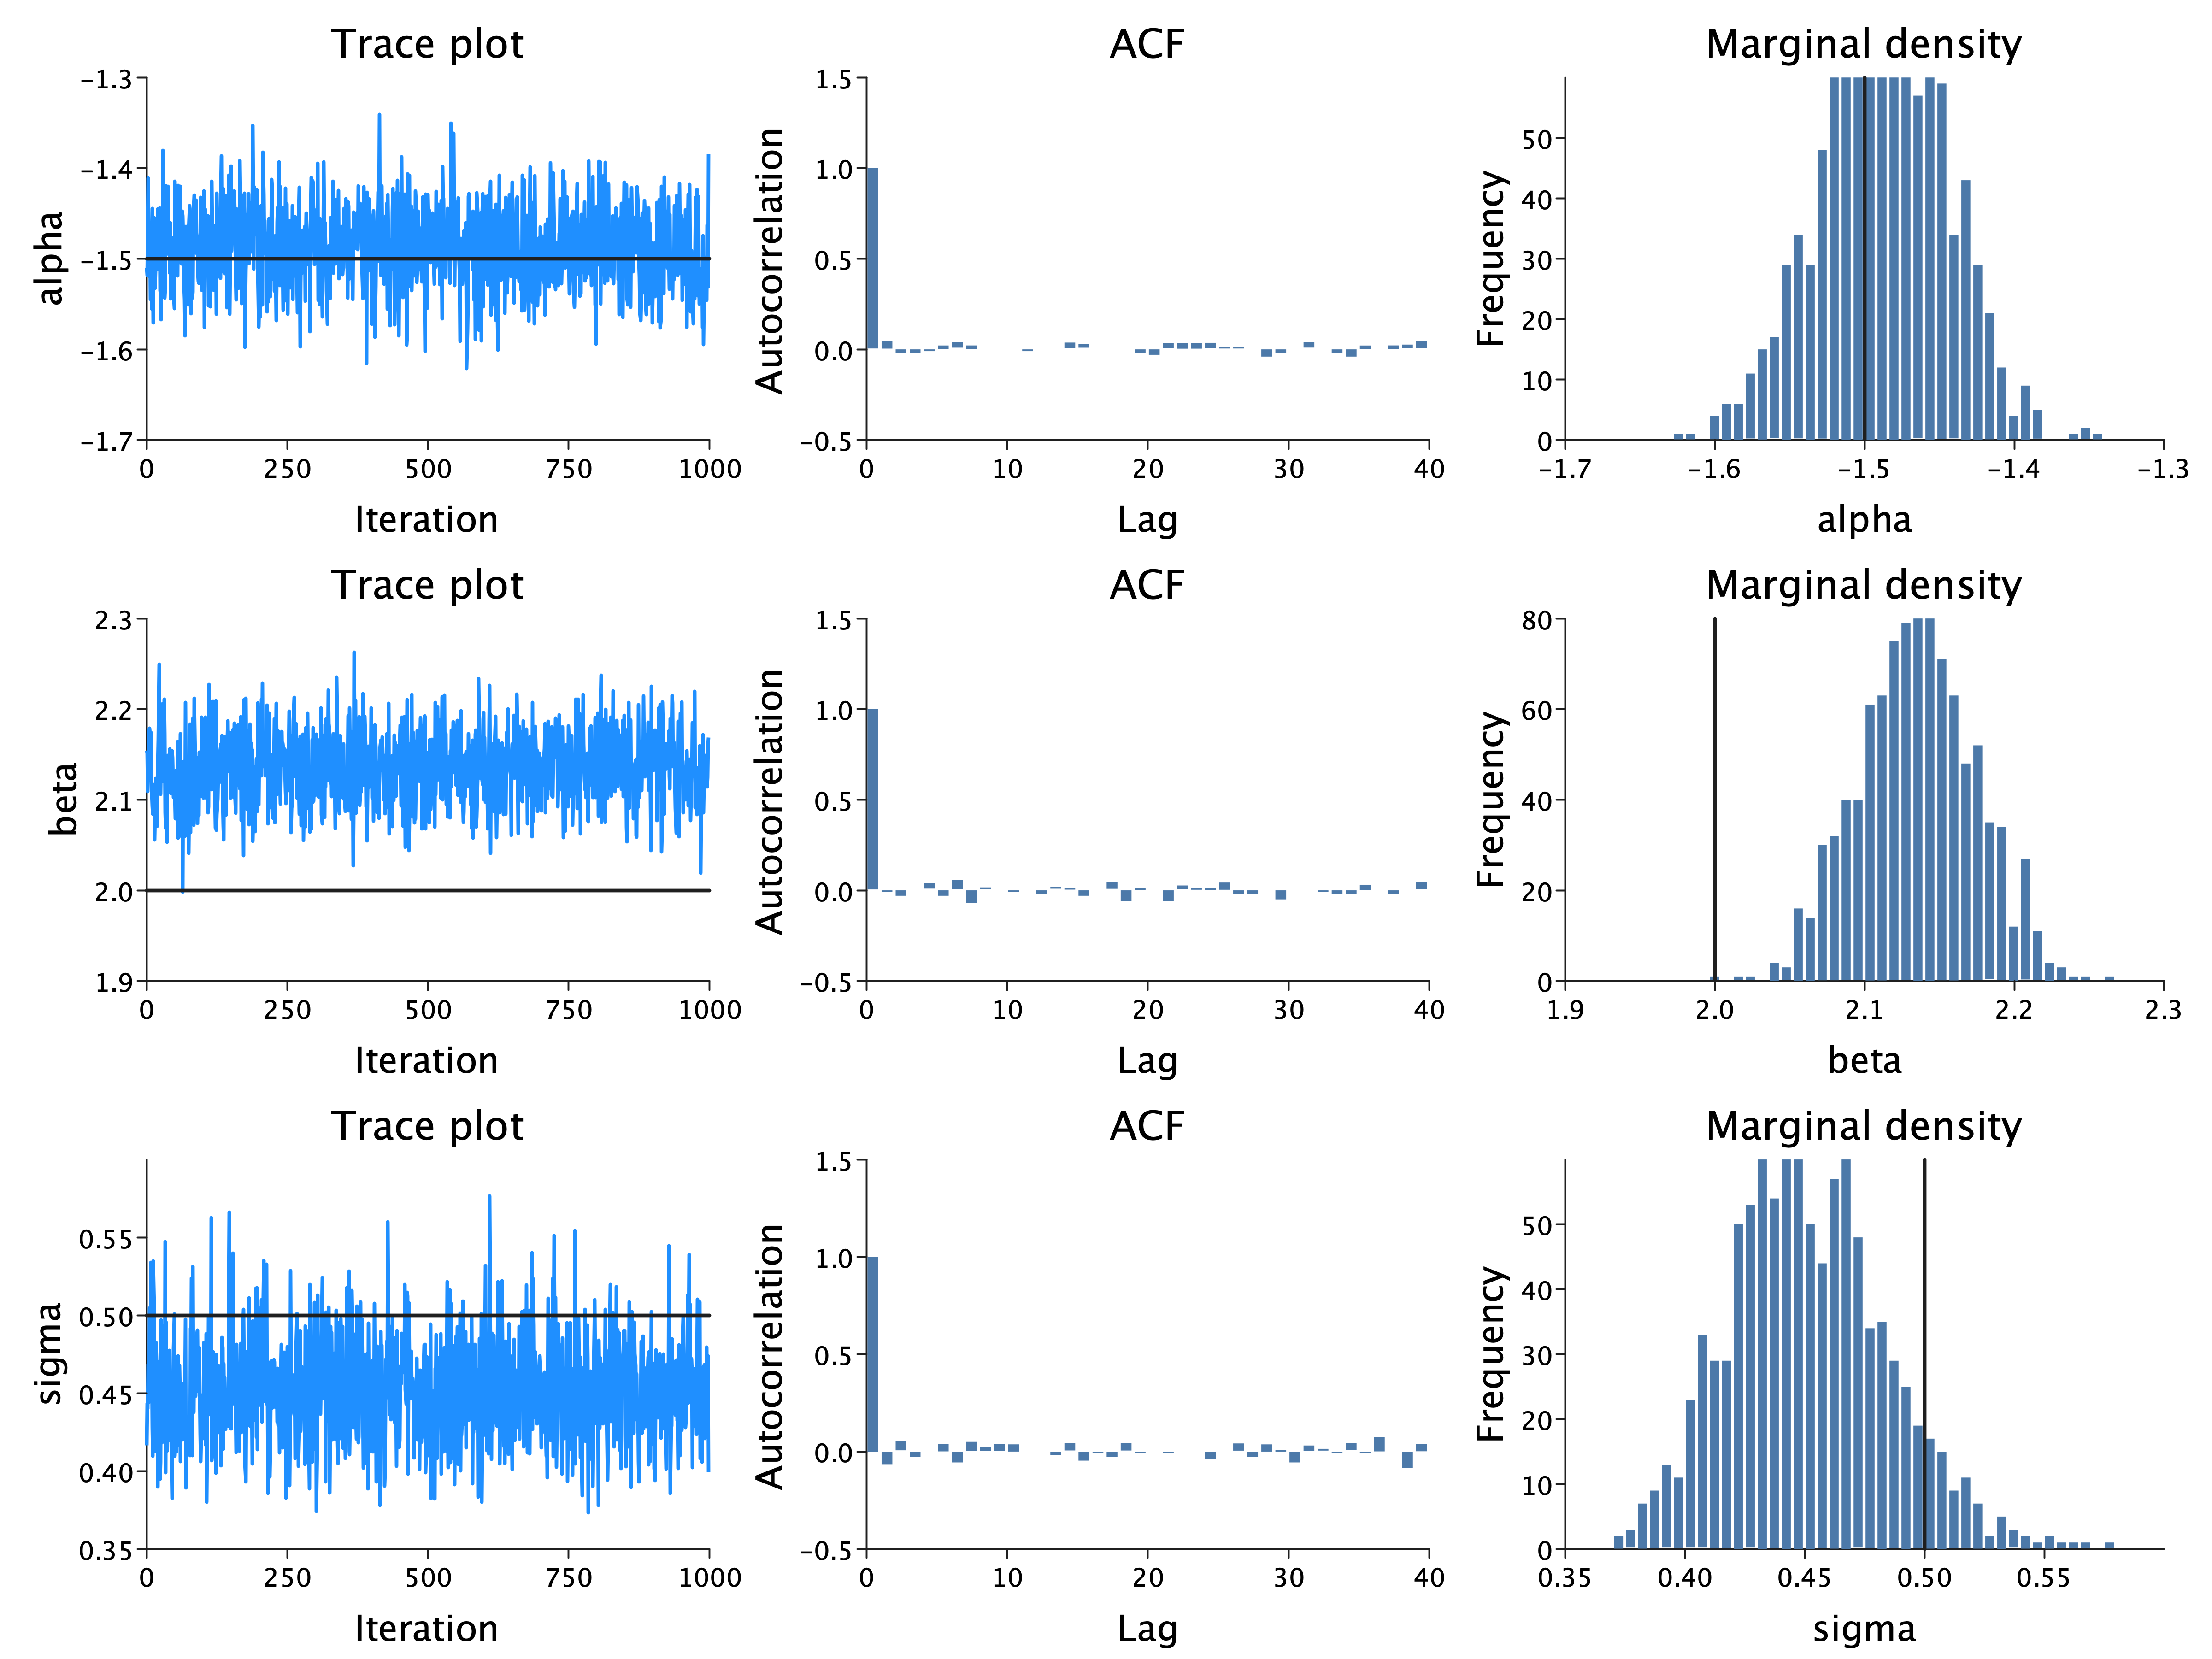

In [26]:
traces(iters, truth = Map("alpha" -> -1.5, "beta" -> 2.0, "sigma" -> 0.5))